In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import  KDTree
from sklearn.model_selection import train_test_split

In [74]:
random_seed = 10

def data_extraction(data_path, train_rate=None):
    data = pd.read_csv(data_path)
    data.drop(columns=['Name'], inplace=True)
    feature = data.keys()[:-1]
    X = data.to_numpy(dtype='float64')
    y = X[:, -1]
    X = X[:, :-1]
    if train_rate:
        X, _X, y, _y = train_test_split(X, y, train_size=train_rate, random_state=random_seed)
    return X, y

def result(truth, prediction):
    threshold = 0.1
    error = prediction - truth
    MSE = np.sum(np.power(error, 2)) / error.shape[0]
    print(f'Accuracy under the threshold {threshold}: {len(truth[abs(truth - prediction) <= threshold]) / len(truth) * 100}')
    print(f'MSE: {MSE}')
    compare = [truth, prediction]
    compare = np.array(compare)
    compare = compare.transpose()
    compare.sort(axis=0)
    x = list(range(len(compare)))
    Tplot = plt.scatter(x, compare[:, 0], s=2)
    Pplot = plt.scatter(x, compare[:, 1], s=2)
    plt.legend(handles=[Pplot, Tplot], labels=['y_pred', 'y_truth'])
    plt.show()

def algorithm(X_train, y_train, alg, train_data_type):
    global all_result
    global X_test, y_test
    prediction = None
    if alg != 'kdtree':
        model_list = {
            'linear': LinearRegression(),
            'mlp': MLPRegressor(hidden_layer_sizes=(10, 10, 10, 10), 
                                learning_rate_init=5e-6,
                                batch_size=50,
                                random_state=random_seed, 
                                max_iter=5000),
            'svr': SVR(kernel='poly', degree=20, C=8.5),
        }
        supervised_model = model_list[alg]
        supervised_model.fit(X_train, y_train)
        prediction = supervised_model.predict(X_test)
        print(f'Score (training): {supervised_model.score(X_train, y_train) * 100}')
        print(f'Score (testing): {supervised_model.score(X_test, y_test) * 100}')
    else:
        unsupervised_model = KDTree(X_train)
        neighbor = list(int(ele[0]) for ele in unsupervised_model.query(X_test, return_distance=False))
        prediction = y_train[neighbor]
    
    result_label = alg + '_' + train_data_type
    all_result[result_label] = prediction
    result(y_test, prediction)

def visualize_experiment(train_data_type=None, algorithm_type=None):
    global all_result
    if train_data_type:
        result_labels = ['ground_truth', 'linear_', 'svr_', 'mlp_', 'kdtree_']
        for i in range(1, len(result_labels)):
            result_labels[i] += train_data_type
    else:
        result_labels = ['ground_truth', '_origin', '_filter', '_hundred', '_thousond']
        for i in range(1, len(result_labels)):
            result_labels[i] = algorithm_type + result_labels[i]
            
    handle = [all_result[label] for label in result_labels]
    handle = np.array(handle)
    handle.sort(axis=1)
    x = list(range(handle.shape[1]))

    plt.figure(figsize=(15, 15))
    for i in range(handle.shape[0]):
        if result_labels[i] == 'ground_truth':
            plt.plot(x, handle[i], label=result_labels[i], linestyle='-', linewidth=5)
        else:
            plt.plot(x, handle[i], label=result_labels[i], linestyle='-.', linewidth=2)

    plt.legend()
    plt.show()

In [75]:

train_data_path = './dataset/train.csv'
test_data_path = './dataset/test.csv'
filter_data_path = './dataset/filter_train_data.csv'
X_train, y_train = data_extraction(train_data_path)
X_train_hundred, y_train_hundred = data_extraction(train_data_path, train_rate=100 / len(X_train))
X_train_thousond, y_train_thousond = data_extraction(train_data_path, train_rate=1000 / len(X_train))

X_test, y_test = data_extraction(test_data_path)
X_filter, y_filter = data_extraction(filter_data_path)


In [76]:
all_result = {}
all_result['ground_truth'] = y_test


## Linear Regression

Score (training): 57.18232632118148
Score (testing): 56.324254327592996
Accuracy under the threshold 0.1: 43.04635761589404
MSE: 0.04099663202720404


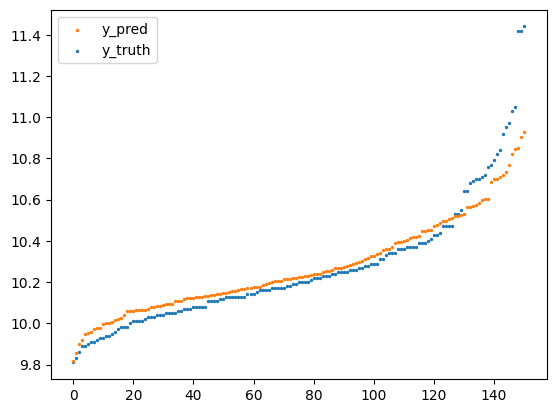

Score (training): 64.26347912315923
Score (testing): 60.55846000500529
Accuracy under the threshold 0.1: 46.35761589403973
MSE: 0.03702215673406583


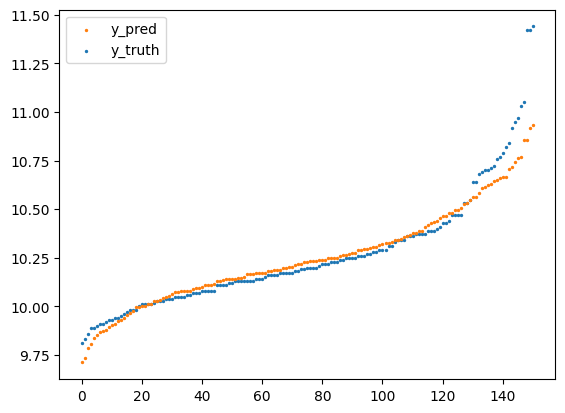

Score (training): 57.25217166434267
Score (testing): 52.52201912366681
Accuracy under the threshold 0.1: 33.11258278145696
MSE: 0.04456563434499898


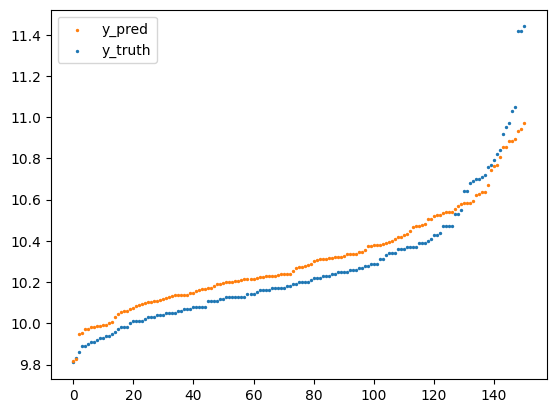

Score (training): 55.72006304713406
Score (testing): 57.524822454704115
Accuracy under the threshold 0.1: 45.033112582781456
MSE: 0.0398697079421538


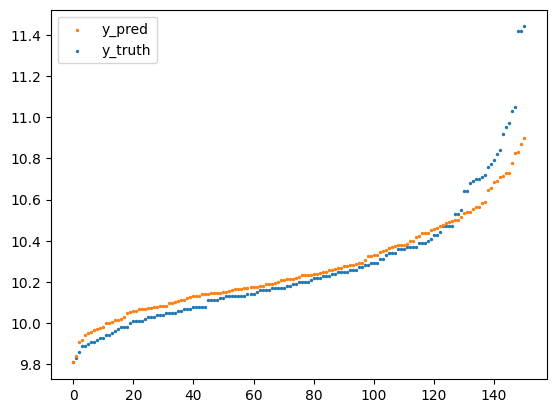

In [77]:
algorithm(X_train, y_train, 'linear', 'origin')
algorithm(X_filter, y_filter, 'linear', 'filter')
algorithm(X_train_hundred, y_train_hundred, 'linear', 'hundred')
algorithm(X_train_thousond, y_train_thousond, 'linear', 'thousond')


## Neural Network

Score (training): -22.192606056621543
Score (testing): -188.36135137799573
Accuracy under the threshold 0.1: 7.28476821192053
MSE: 0.2706729795063271


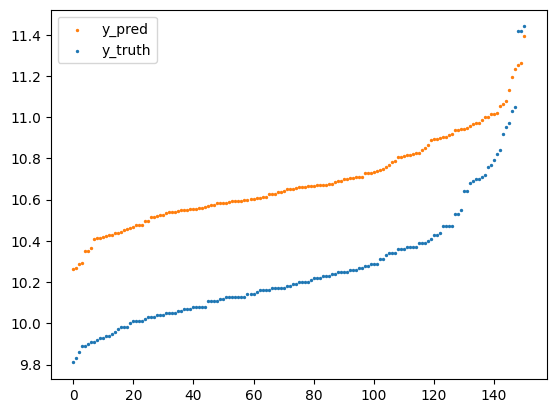

Score (training): -14.810964984829788
Score (testing): -108.13410405006545
Accuracy under the threshold 0.1: 9.933774834437086
MSE: 0.195366951260619


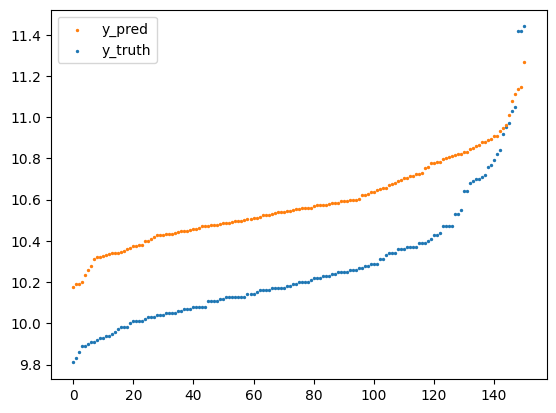

Score (training): -9307.56348367724
Score (testing): -10915.460806163932
Accuracy under the threshold 0.1: 1.9867549668874174
MSE: 10.339761492971968


d:\anaconda3\envs\ai-final\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


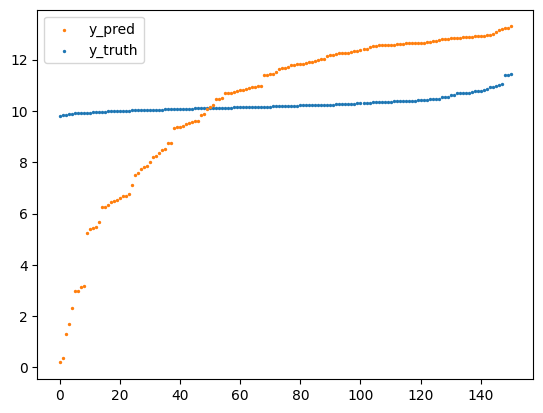

Score (training): -22.71690393169765
Score (testing): -110.76037142987971
Accuracy under the threshold 0.1: 7.9470198675496695
MSE: 0.19783212078932877


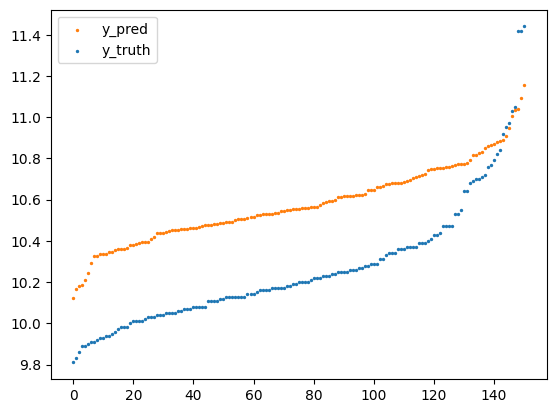

In [78]:
algorithm(X_train, y_train, 'mlp', 'origin')
algorithm(X_filter, y_filter, 'mlp', 'filter')
algorithm(X_train_hundred, y_train_hundred, 'mlp', 'hundred')
algorithm(X_train_thousond, y_train_thousond, 'mlp', 'thousond')


## SVM

Score (training): 57.06579367402709
Score (testing): 53.13513612406023
Accuracy under the threshold 0.1: 38.41059602649007
MSE: 0.04399012655073521


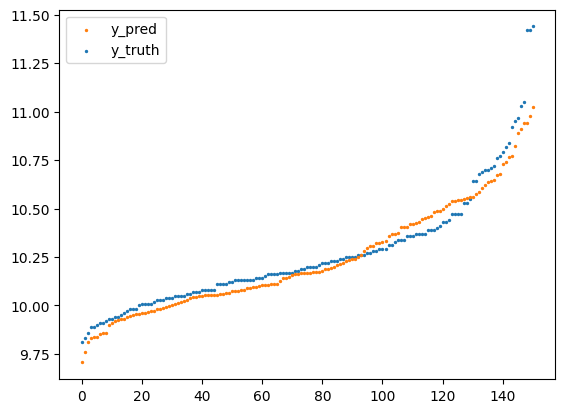

Score (training): 61.69088247952512
Score (testing): 50.73113067335906
Accuracy under the threshold 0.1: 34.437086092715234
MSE: 0.04624666791795115


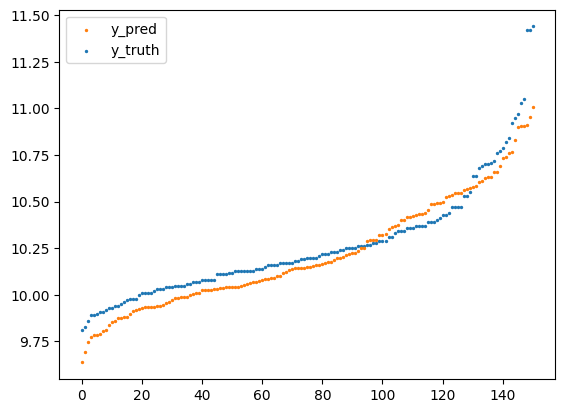

Score (training): 46.17777677380316
Score (testing): 26.889297829750593
Accuracy under the threshold 0.1: 30.4635761589404
MSE: 0.06862601904053627


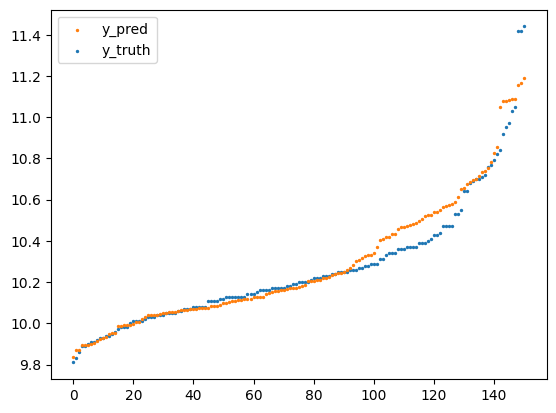

Score (training): 55.062619160098826
Score (testing): 51.76545796721346
Accuracy under the threshold 0.1: 33.77483443708609
MSE: 0.04527578728823286


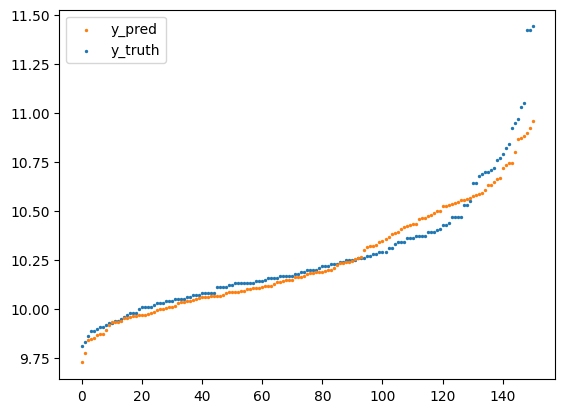

In [85]:
algorithm(X_train, y_train, 'svr', 'origin')
algorithm(X_filter, y_filter, 'svr', 'filter')
algorithm(X_train_hundred, y_train_hundred, 'svr', 'hundred')
algorithm(X_train_thousond, y_train_thousond, 'svr', 'thousond')


## Nearest Neighbor Regression

Accuracy under the threshold 0.1: 26.490066225165563
MSE: 0.13674238410596024


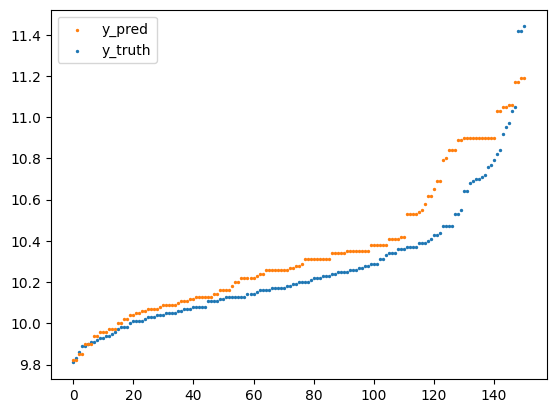

Accuracy under the threshold 0.1: 24.503311258278146
MSE: 0.13496622516556286


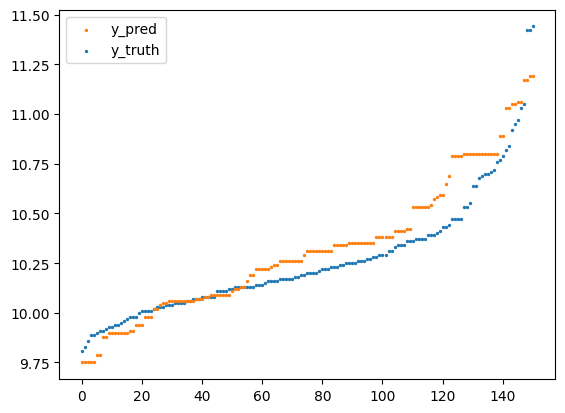

Accuracy under the threshold 0.1: 12.582781456953644
MSE: 0.19771456953642394


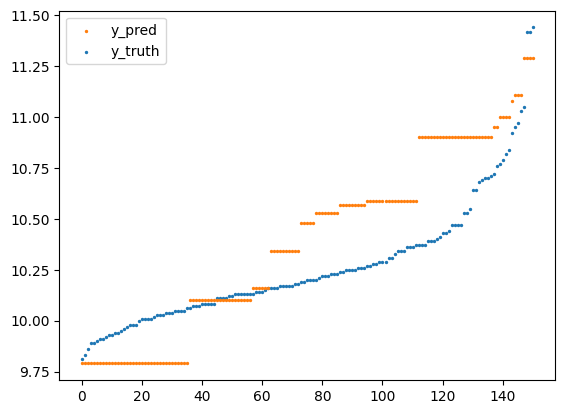

Accuracy under the threshold 0.1: 23.178807947019866
MSE: 0.14471920529801327


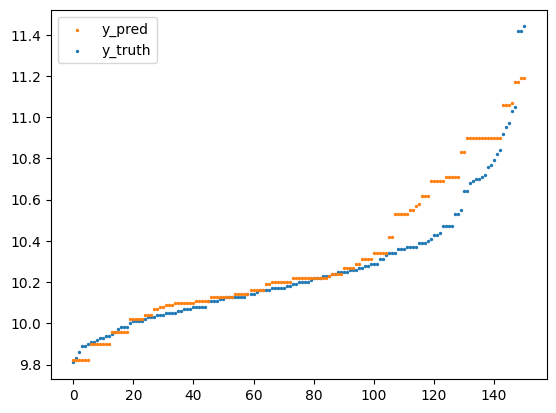

In [86]:
algorithm(X_train, y_train, 'kdtree', 'origin')
algorithm(X_filter, y_filter, 'kdtree', 'filter')
algorithm(X_train_hundred, y_train_hundred, 'kdtree', 'hundred')
algorithm(X_train_thousond, y_train_thousond, 'kdtree', 'thousond')


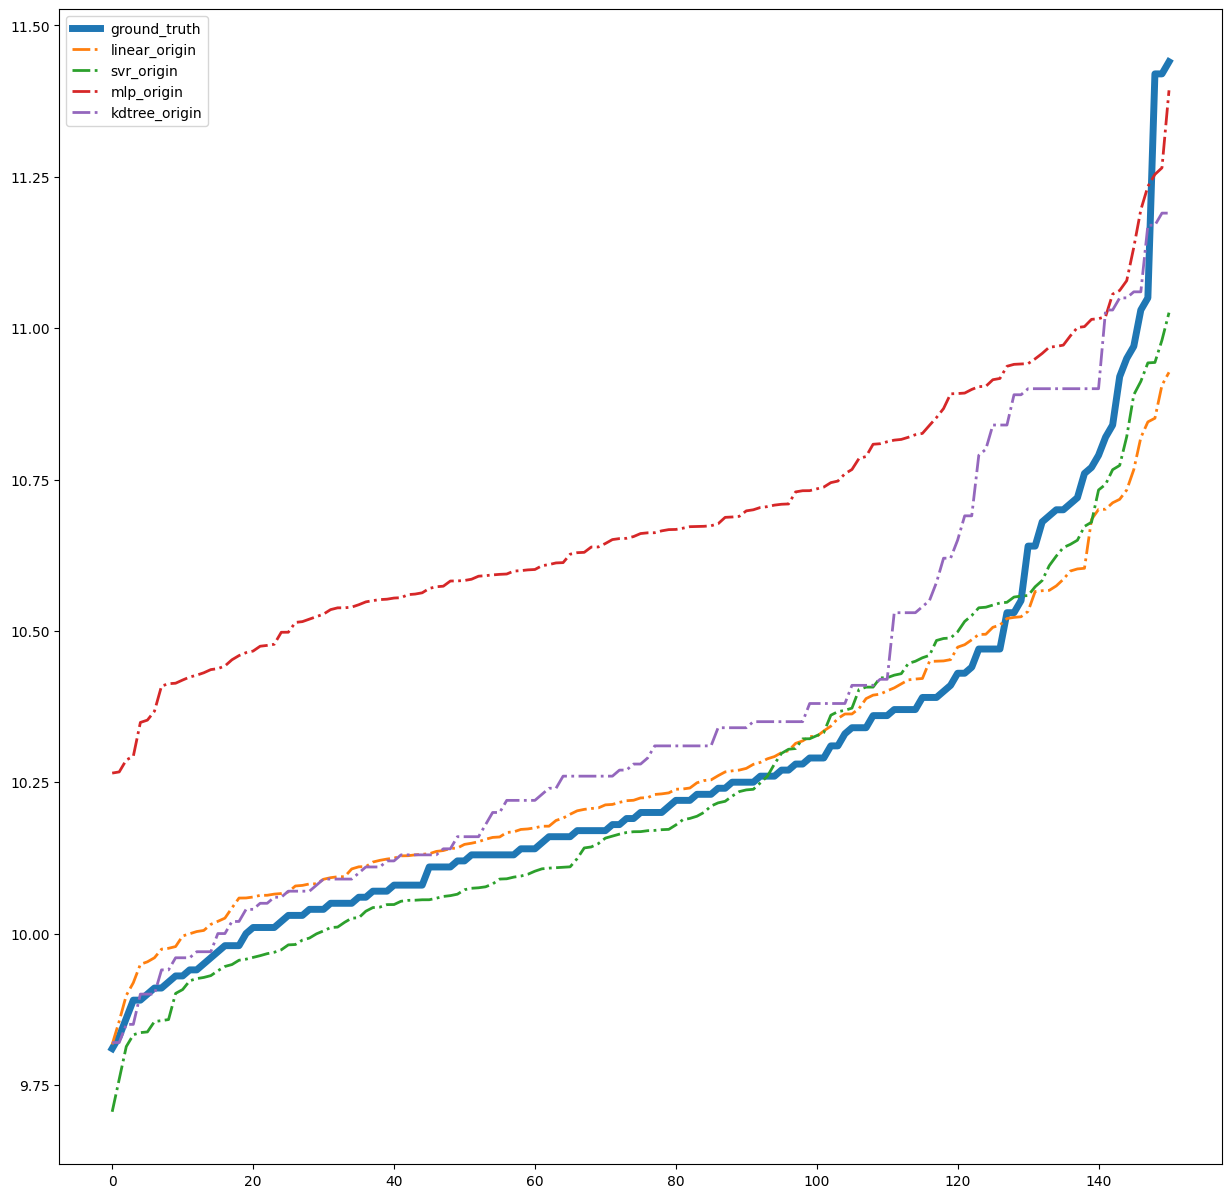

In [ ]:
visualize_experiment('origin')

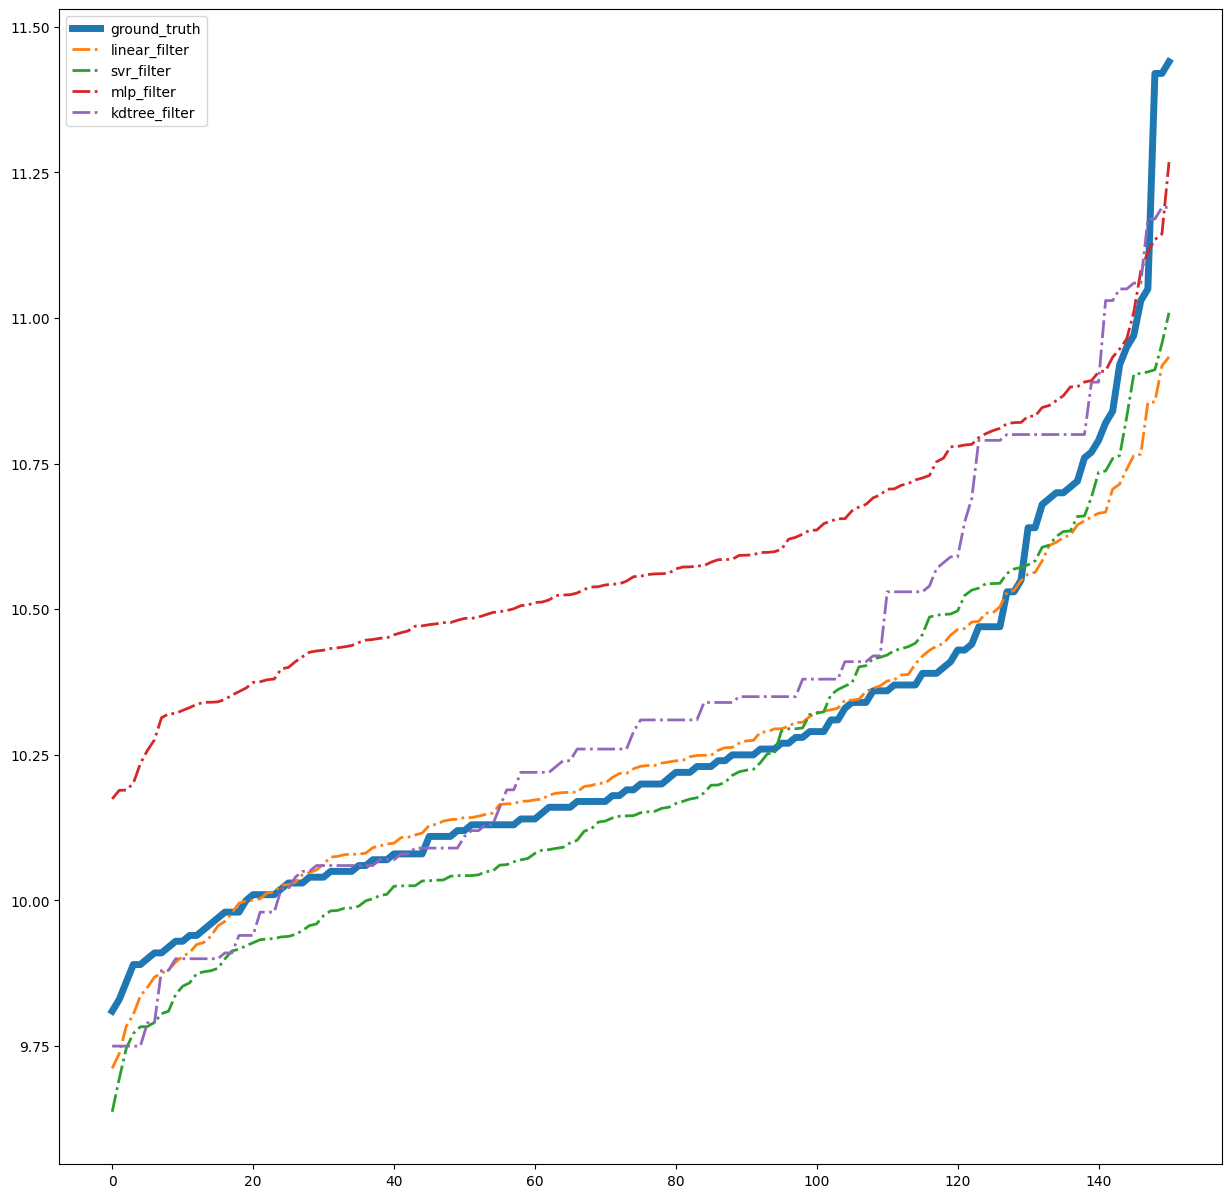

In [ ]:
visualize_experiment('filter')


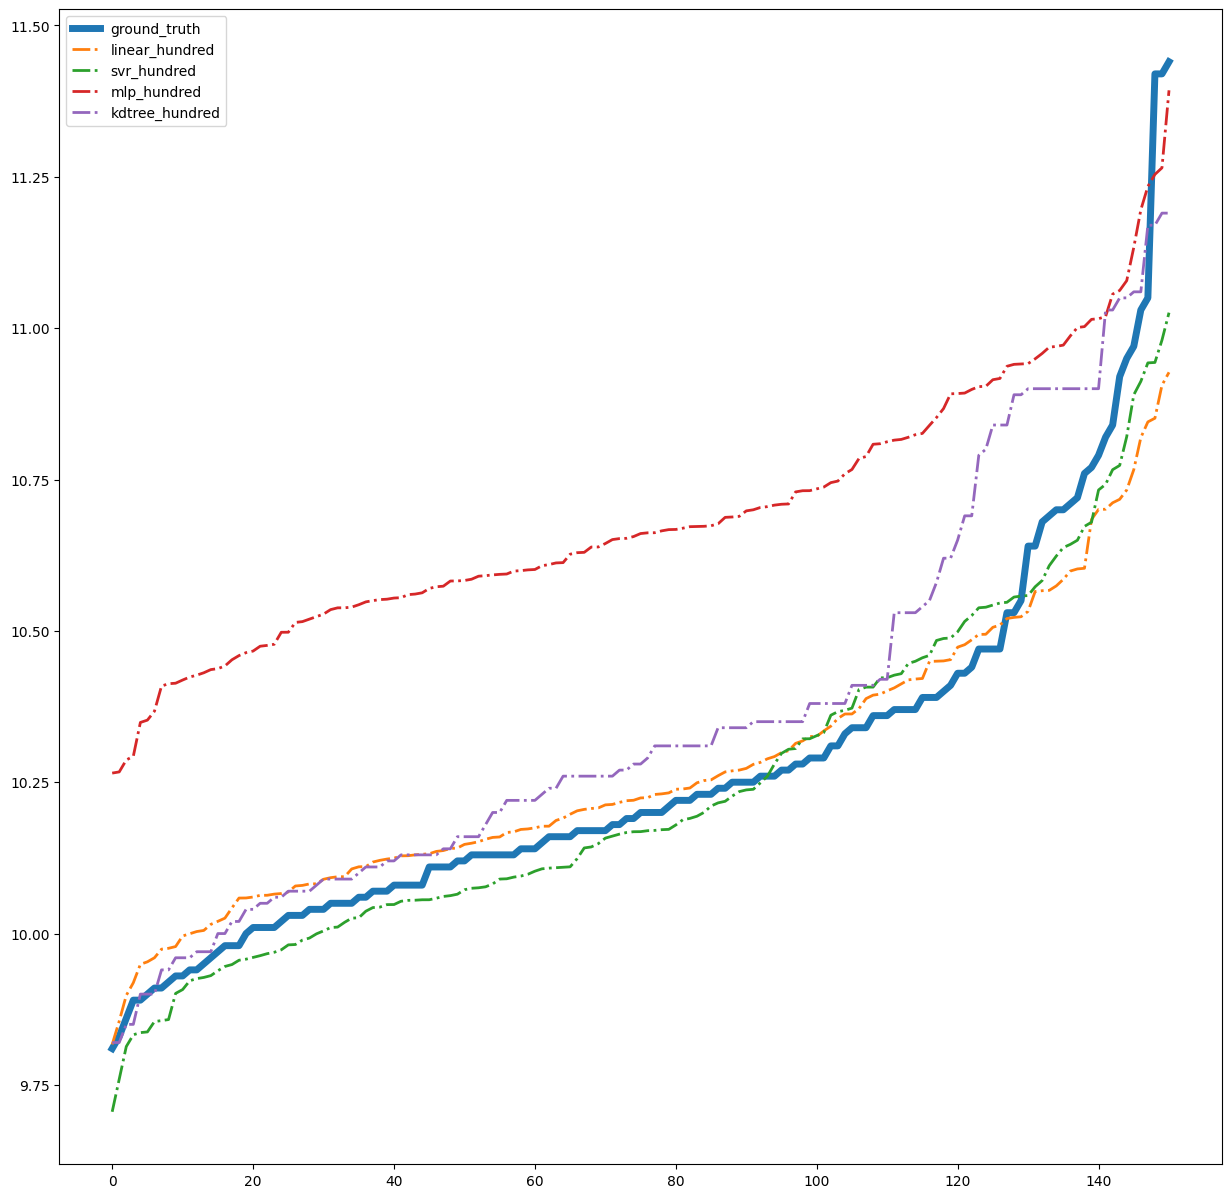

In [ ]:
visualize_experiment('hundred')

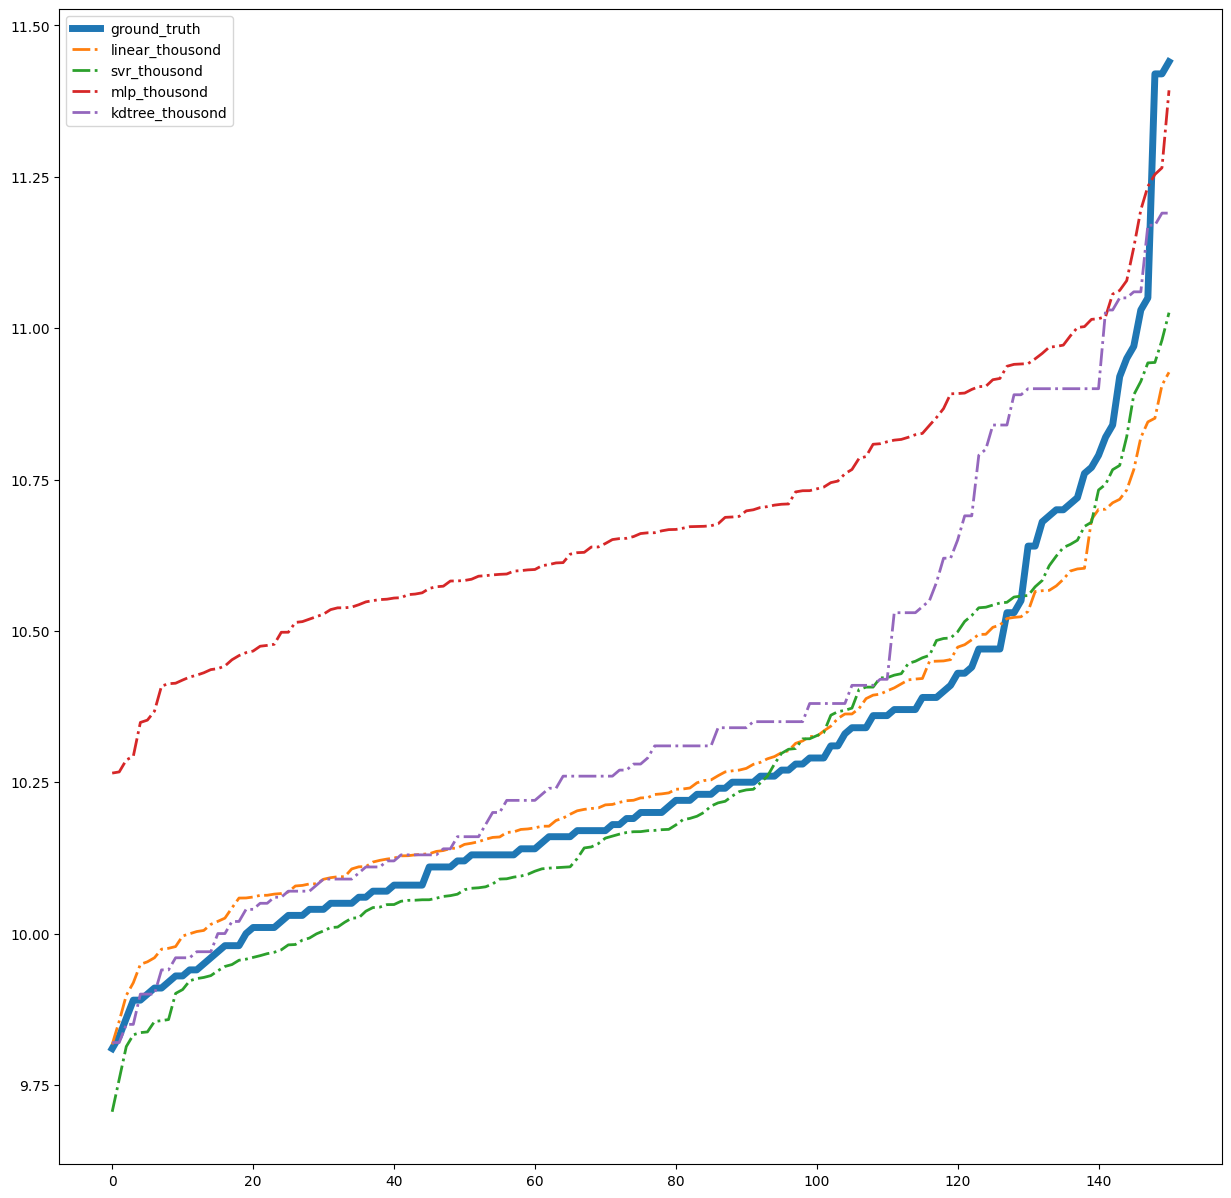

In [ ]:
visualize_experiment('thousond')

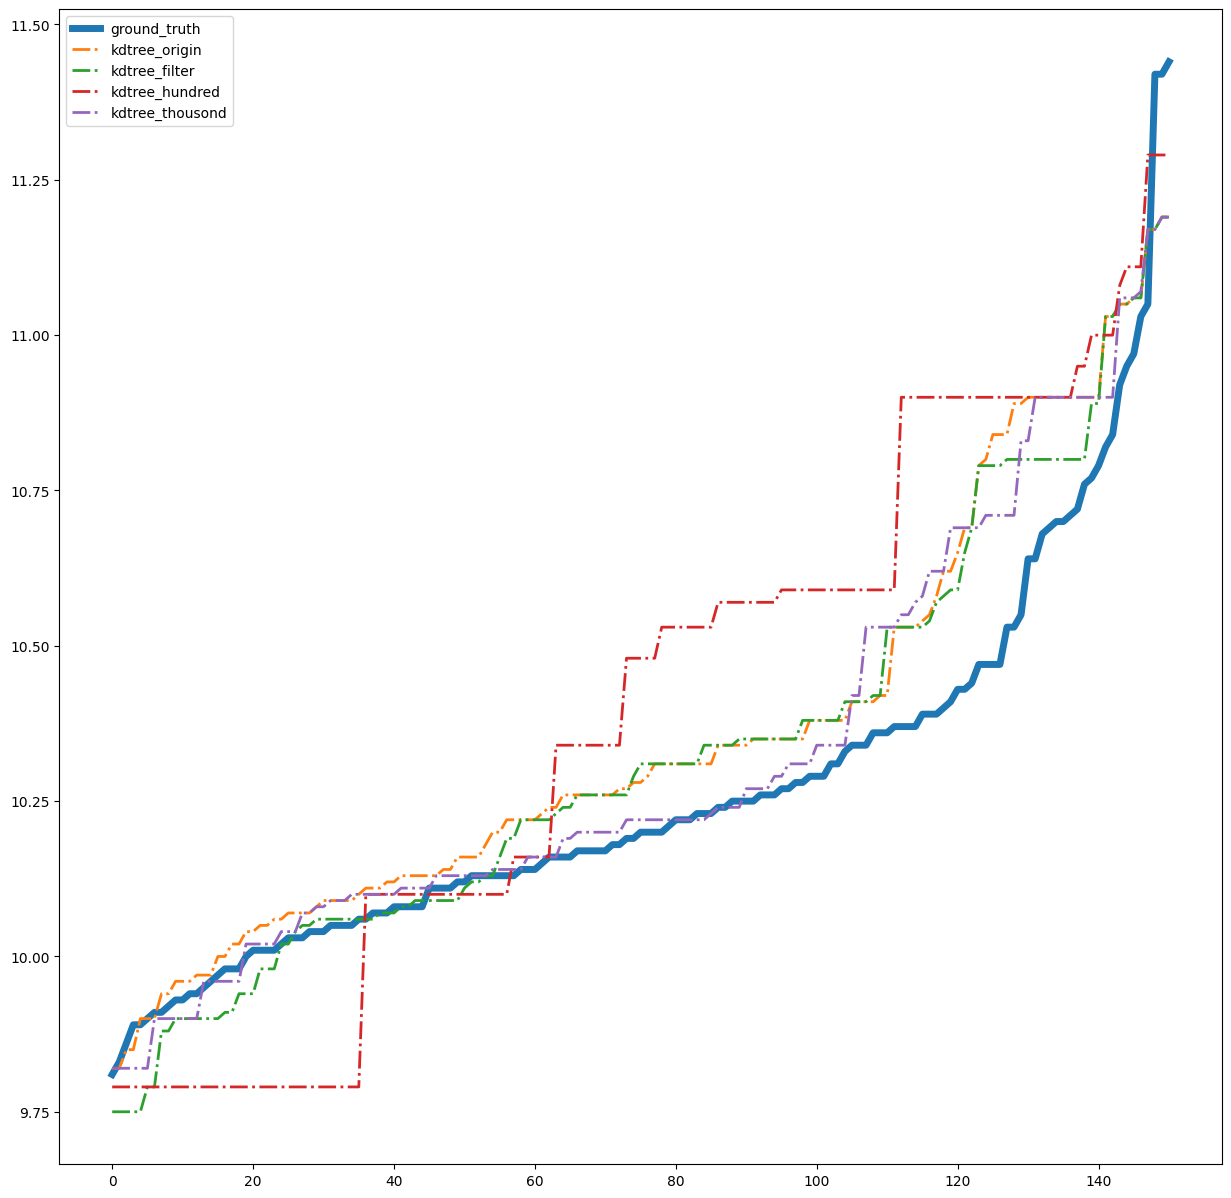

In [87]:
visualize_experiment(algorithm_type='kdtree')